TASK 1

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [ ]:
dataset = pd.read_csv('iris.csv')
dataset.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [ ]:
X= dataset.iloc[:,:-1]
X.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [ ]:
model = KMeans(n_clusters=3,random_state=0,n_init=10)
model.fit(X)
centroids=model.cluster_centers_

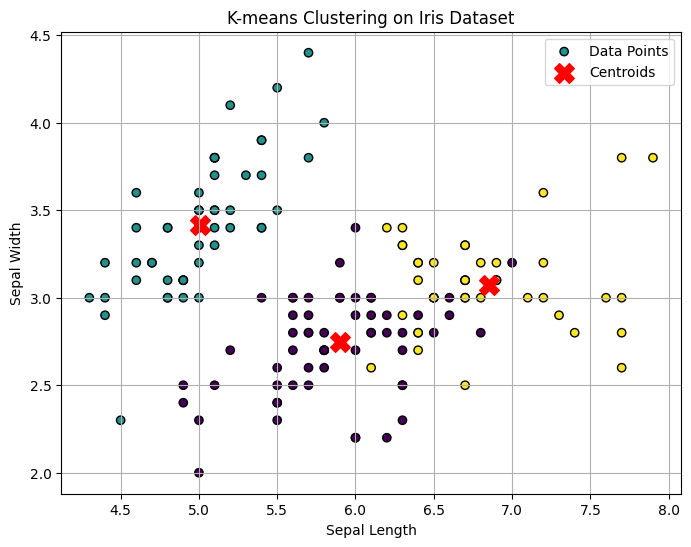

In [ ]:
plt.figure(figsize=(8, 6))
plt.scatter(X['sepal_length'], X['sepal_width'], c=labels, cmap='viridis', edgecolors='k', label='Data Points')
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', marker='X', s=200, label='Centroids')
plt.xlabel("Sepal Length")
plt.ylabel("Sepal Width")
plt.legend()
plt.title("K-means Clustering on Iris Dataset")
plt.grid(True)
plt.show()

TASK 2

In [ ]:
for init_method in ('random','k-means++'):
    model = KMeans(n_clusters=3,init=init_method,random_state=0,n_init=10)
    model.fit(X)
    centroids=model.cluster_centers_

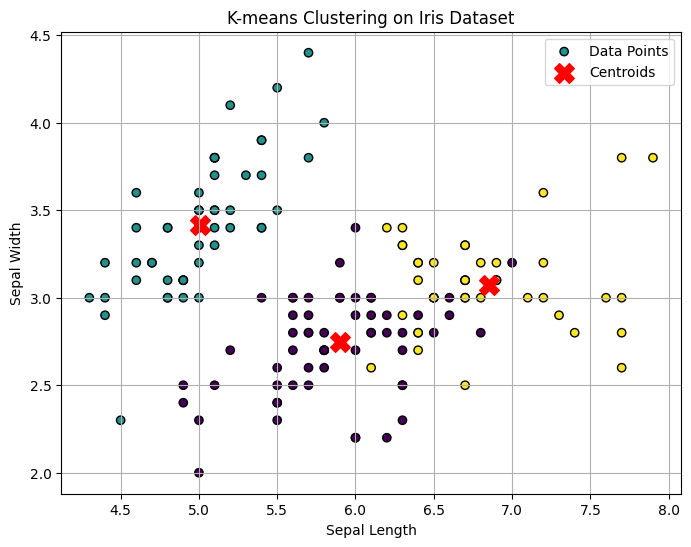

In [ ]:
plt.figure(figsize=(8, 6))
plt.scatter(X['sepal_length'], X['sepal_width'], c=labels, cmap='viridis', edgecolors='k', label='Data Points')
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', marker='X', s=200, label='Centroids')
plt.xlabel("Sepal Length")
plt.ylabel("Sepal Width")
plt.legend()
plt.title("K-means Clustering on Iris Dataset")
plt.grid(True)
plt.show()

TEXT 3

In [ ]:
X=StandardScaler().fit_transform(X)
model=KMeans(n_clusters=3,random_state=0,n_init=10)
cluster=model.fit_predict(X)

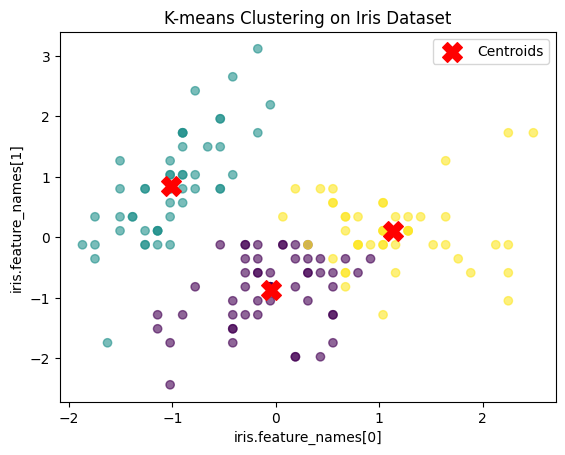

In [ ]:
plt.scatter(X[:,0],X[:,1],c=cluster, cmap='viridis',alpha=0.6 )
plt.scatter(model.cluster_centers_[:, 0], model.cluster_centers_[:, 1], c='red', marker='X', s=200, label='Centroids')
plt.xlabel("iris.feature_names[0]")
plt.ylabel("iris.feature_names[1]")
plt.legend()
plt.title("K-means Clustering on Iris Dataset")
plt.show()

TEXT 4

In [ ]:
wcss = []
K_range = range(1, 11)

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

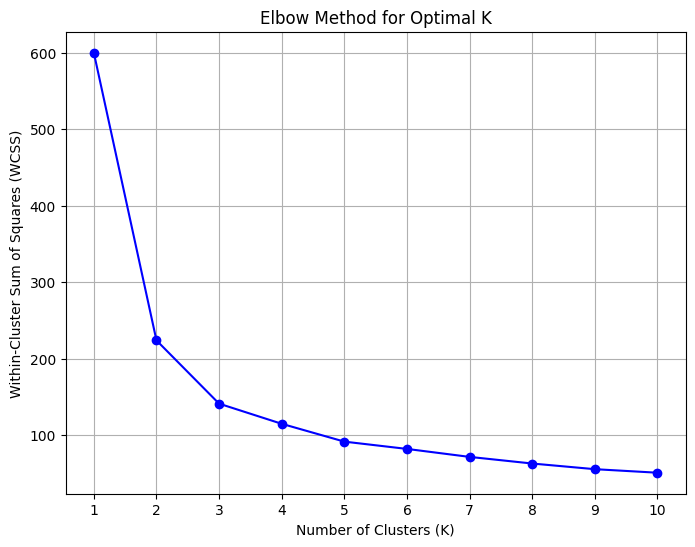

In [ ]:
plt.figure(figsize=(8, 6))
plt.plot(K_range, wcss, marker='o', linestyle='-', color='b')
plt.xlabel("Number of Clusters (K)")
plt.ylabel("Within-Cluster Sum of Squares (WCSS)")
plt.title("Elbow Method for Optimal K")
plt.xticks(K_range)
plt.grid(True)
plt.show()


TASK 5

In [ ]:
iris_df = pd.DataFrame(X, columns=['Sepal Length', 'Sepal Width', 'Petal Length', 'Petal Width'])
iris_df['Cluster'] = labels

cluster_summary = iris_df.groupby('Cluster').mean()
print(cluster_summary)

         Sepal Length  Sepal Width  Petal Length  Petal Width
Cluster                                                      
0            0.070616    -0.707197      0.361030     0.309230
1           -1.014579     0.842307     -1.304878    -1.255129
2            1.219757     0.045550      1.127896     1.146952


TASK 6

In [ ]:
pca = PCA(n_components=2)  # Reduce to 2 dimensions
X_pca = pca.fit_transform(X)

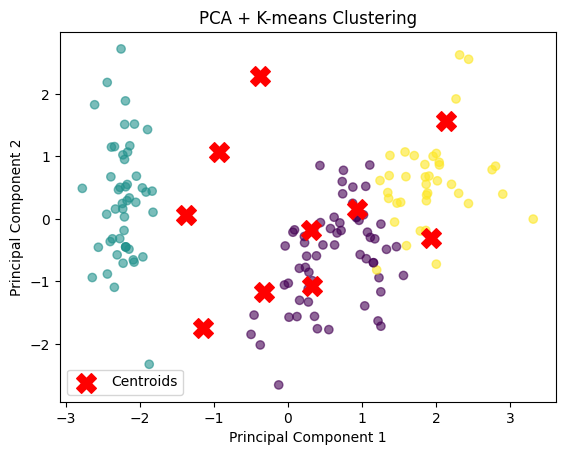

In [ ]:
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels, cmap='viridis', alpha=0.6)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], c='red', marker='X', s=200, label='Centroids')
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("PCA + K-means Clustering")
plt.legend()
plt.show()

TASK 7

In [ ]:
kmeans_plus = KMeans(n_clusters=3, init='k-means++', random_state=42, n_init=10)
kmeans_random = KMeans(n_clusters=3, init='random', random_state=42, n_init=10)
labels_plus = kmeans_plus.fit_predict(X)
labels_random = kmeans_random.fit_predict(X)

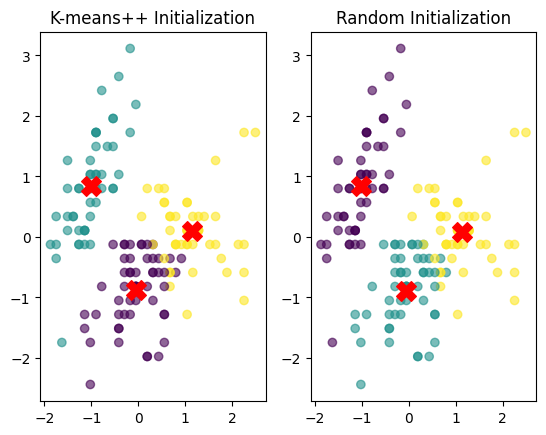

In [ ]:

plt.subplot(1, 2, 1)
plt.scatter(X[:, 0], X[:, 1], c=labels_plus, cmap='viridis', alpha=0.6)
plt.scatter(kmeans_plus.cluster_centers_[:, 0], kmeans_plus.cluster_centers_[:, 1], c='red', marker='X', s=200)
plt.title("K-means++ Initialization")

plt.subplot(1, 2, 2)
plt.scatter(X[:, 0], X[:, 1], c=labels_random, cmap='viridis', alpha=0.6)
plt.scatter(kmeans_random.cluster_centers_[:, 0], kmeans_random.cluster_centers_[:, 1], c='red', marker='X', s=200)
plt.title("Random Initialization")

plt.show()

TASK 8

In [ ]:
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
labels = kmeans.fit_predict(X)
distances = np.min(kmeans.transform(X), axis=1)
threshold = np.percentile(distances, 95)
anomalies = X[distances > threshold]

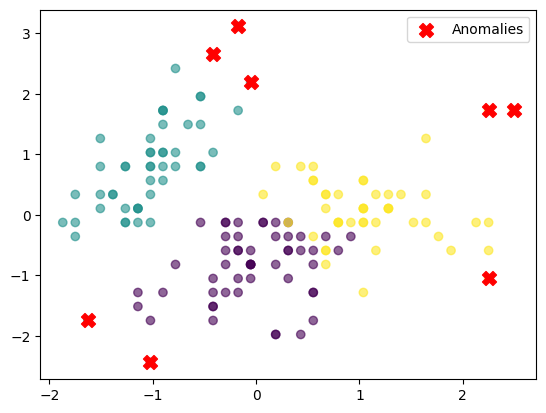

In [ ]:
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis', alpha=0.6)
plt.scatter(anomalies[:, 0], anomalies[:, 1], c='red', marker='X', s=100, label='Anomalies')
plt.legend()
plt.show()